In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error
)

In [28]:
results_bert_MSE = pd.read_csv(r'../data/predictions_bert.csv')
results_distilbert_MSE = pd.read_csv(r'../data/predictions_distilbert.csv')

## Distribution target difficulty vs predicted

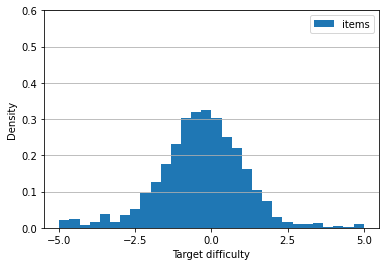

In [29]:
# target difficulty test set
plt.figure(figsize=(6,4)) 

x = results_bert_MSE[results_bert_MSE['split']=='test'].difficulty.plot.hist(bins=30, density=True)
x.legend(['items']);
x.set_xlabel("Target difficulty")
x.set_ylabel("Density")
x.set_xticks([-5, -2.5,  0, 2.5,5]);
x.set_yticks([0.00,  0.1,0.20,0.3,  0.40, 0.5,0.6]);
x.set_xlim([-5.5,5.5])
x.set_ylim([0,0.6])
x.grid(axis='y')

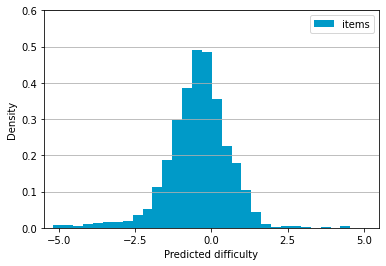

In [30]:
# predicted difficulty by BERT test set

plt.figure(figsize=(6,4)) 
x = results_bert_MSE[results_bert_MSE['split']=='test'].predicted_difficulty.plot.hist(bins=30, density=True, color='#009ac8')
x.legend(['items']);
x.set_xlabel("Predicted difficulty")
x.set_ylabel("Density")
x.set_xticks([-5, -2.5,  0, 2.5,5]);
x.set_yticks([0.00,  0.1,0.20,0.3,  0.40, 0.5,0.6]);
x.set_xlim([-5.5,5.5])
x.set_ylim([0,0.6])
x.grid(axis='y')

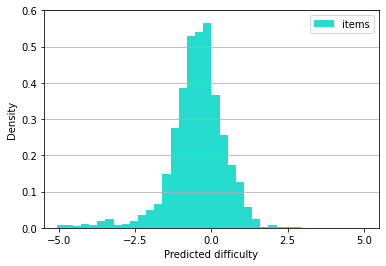

In [31]:
# predicted difficulty by DistilBERT test set

plt.figure(figsize=(6,4)) 
x = results_distilbert_MSE[results_distilbert_MSE['split']=='test'].predicted_difficulty.plot.hist(bins=30, density=True, color='#26dcce')
x.legend(['items']);
x.set_xlabel("Predicted difficulty")
x.set_ylabel("Density")
x.set_xticks([-5, -2.5,  0, 2.5,5]);
x.set_yticks([0.00,  0.1,0.20,0.3,  0.40, 0.5,0.6]);
x.set_xlim([-5.5,5.5])
x.set_ylim([0,0.6])
x.grid(axis='y')

In [32]:
def count_digits(string):
    return sum(item.isdigit() for item in string)/len(string)

def cloze(string):
    if '__' in string:
        return 1
    return 0

def q_mark(string):
    if '?' in string:
        return 1
    return 0

In [33]:

results_bert_MSE.predicted_difficulty = results_bert_MSE.predicted_difficulty.clip(-5, 5)

results_bert_MSE['MAE'] = (results_bert_MSE['predicted_difficulty']-results_bert_MSE['difficulty']).abs()
results_bert_MSE['totalwords'] = results_bert_MSE['body'].str.split().str.len()
results_bert_MSE['digits'] = results_bert_MSE['body'].apply(count_digits)
results_bert_MSE['cloze'] = results_bert_MSE['body'].apply(cloze)
results_bert_MSE['question_mark'] = results_bert_MSE['body'].apply(q_mark)


df_test_b = results_bert_MSE[results_bert_MSE['split']=='test']
df_train_b = results_bert_MSE[results_bert_MSE['split']=='train']
df_train_b.dropna(inplace=True)

<ipython-input-33-876b56742ea2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_b.dropna(inplace=True)


In [34]:

results_distilbert_MSE.predicted_difficulty = results_distilbert_MSE.predicted_difficulty.clip(-5, 5)

results_distilbert_MSE['MAE'] = (results_distilbert_MSE['predicted_difficulty']-results_distilbert_MSE['difficulty']).abs()
results_distilbert_MSE['totalwords'] = results_distilbert_MSE['body'].str.split().str.len()
results_distilbert_MSE['digits'] = results_distilbert_MSE['body'].apply(count_digits)
results_distilbert_MSE['cloze'] = results_distilbert_MSE['body'].apply(cloze)
results_distilbert_MSE['question_mark'] = results_distilbert_MSE['body'].apply(q_mark)


df_test_db = results_distilbert_MSE[results_distilbert_MSE['split']=='test']
df_train_db = results_distilbert_MSE[results_distilbert_MSE['split']=='train']
df_train_db.dropna(inplace=True)

<ipython-input-34-bbf9130121ed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_db.dropna(inplace=True)


## Error x input lenght x difficulty

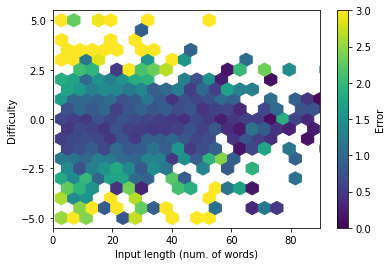

In [35]:
# BERT

df = df_test_b
hb =plt.hexbin(df.totalwords, df.difficulty, C=df.MAE,gridsize=(230,10),vmax=3,vmin=0)
plt.xlabel("Input length (num. of words)")
plt.ylabel("Difficulty")
plt.yticks([-5,-2.5,0,2.5,5]);
plt.xlim([0, 90])
cb = plt.colorbar(hb)  
cb.set_label('Error')

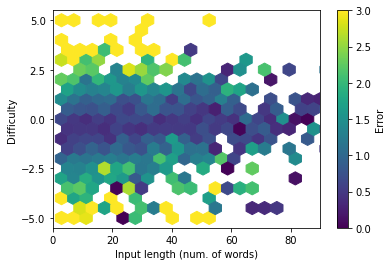

In [36]:
# DistilBERT

df = df_test_db
hb =plt.hexbin(df.totalwords, df.difficulty, C=df.MAE,gridsize=(230,10),vmax=3,vmin=0)
plt.xlabel("Input length (num. of words)")
plt.ylabel("Difficulty")
plt.yticks([-5,-2.5,0,2.5,5]);
plt.xlim([0, 90])
cb = plt.colorbar(hb)  
cb.set_label('Error')

## Error x percentage of digits x difficulty

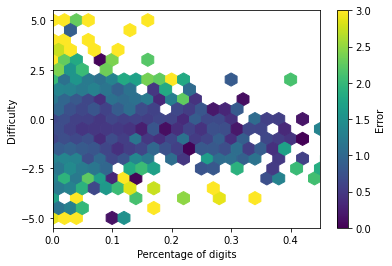

In [37]:
# BERT

df = df_test_b
hb =plt.hexbin(df.digits, df.difficulty, C=df.MAE,gridsize=(35,10),vmax=3, vmin=0)
plt.xlabel("Percentage of digits")
plt.ylabel("Difficulty")
plt.xlim([0, 0.45])
plt.yticks([-5,-2.5,0,2.5,5]);
cb = plt.colorbar(hb)  
cb.set_label('Error')

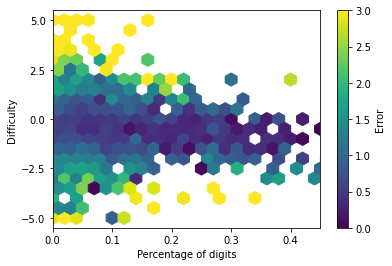

In [38]:
# DistilBERT

df = df_test_db
hb =plt.hexbin(df.digits, df.difficulty, C=df.MAE,gridsize=(35,10),vmax=3, vmin=0)
plt.xlabel("Percentage of digits")
plt.ylabel("Difficulty")
plt.xlim([0, 0.45])
plt.yticks([-5,-2.5,0,2.5,5]);
cb = plt.colorbar(hb)  
cb.set_label('Error')

## Error per presence of digits

In [39]:
# BERT
df_test_q0 = df_test_b[df_test_b['digits']==0]
df_test_q1 = df_test_b[df_test_b['digits']>0]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

N digits TEST mae: 1.067043240363834 rmse: 1.433863121173578
Y digits TEST mae: 0.8690398172057013 rmse: 1.1710510919773656


In [40]:
# DistilBERT
df_test_q0 = df_test_db[df_test_db['digits']==0]
df_test_q1 = df_test_db[df_test_db['digits']>0]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y digits TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

N digits TEST mae: 1.0582537320430245 rmse: 1.4257205378074838
Y digits TEST mae: 0.8718079998728365 rmse: 1.1755310724046473


## Error per question mark Y/N

In [41]:
# BERT
df_test_q0 = df_test_b[df_test_b['question_mark']==0]
df_test_q1 = df_test_b[df_test_b['question_mark']==1]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N ? TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y ? TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

N ? TEST mae: 0.9184148913220781 rmse: 1.2598768899479553
Y ? TEST mae: 0.893933595250128 rmse: 1.1817975207173885


In [42]:
# DistilBERT
df_test_q0 = df_test_db[df_test_db['question_mark']==0]
df_test_q1 = df_test_db[df_test_db['question_mark']==1]

true_diff = df_test_q0['difficulty']
pred_diff = df_test_q0['predicted_difficulty']
print('N ? TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_q1['difficulty']
pred_diff = df_test_q1['predicted_difficulty']
print('Y ? TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

N ? TEST mae: 0.9062645620826052 rmse: 1.2537254188826648
Y ? TEST mae: 0.9114308728971574 rmse: 1.1943617379663343


## Error per problem type

In [43]:
# BERT

df_test_a = df_test_b[df_test_b['problem_type']=='algebra']
df_test_f = df_test_b[df_test_b['problem_type']=='fill_in_1']
df_test_c = df_test_b[df_test_b['problem_type']=='choose_1']

true_diff = df_test_a['difficulty']
pred_diff = df_test_a['predicted_difficulty']
print('algebra   TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_f['difficulty']
pred_diff = df_test_f['predicted_difficulty']
print('fill_in_1 TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_c['difficulty']
pred_diff = df_test_c['predicted_difficulty']
print('choose_1  TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

algebra   TEST mae: 0.8523826907455349 rmse: 1.155773211745945
fill_in_1 TEST mae: 0.8758887463353798 rmse: 1.2111073700880743
choose_1  TEST mae: 0.9651530397380601 rmse: 1.274807487074952


In [44]:
# DistilBERT

df_test_a = df_test_db[df_test_db['problem_type']=='algebra']
df_test_f = df_test_db[df_test_db['problem_type']=='fill_in_1']
df_test_c = df_test_db[df_test_db['problem_type']=='choose_1']

true_diff = df_test_a['difficulty']
pred_diff = df_test_a['predicted_difficulty']
print('algebra   TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_f['difficulty']
pred_diff = df_test_f['predicted_difficulty']
print('fill_in_1 TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

true_diff = df_test_c['difficulty']
pred_diff = df_test_c['predicted_difficulty']
print('choose_1  TEST mae:',mean_absolute_error(true_diff, pred_diff),'rmse:',np.sqrt(mean_squared_error(true_diff, pred_diff)))

algebra   TEST mae: 0.8538479423518744 rmse: 1.156102426371933
fill_in_1 TEST mae: 0.8769806483623208 rmse: 1.2152048852847943
choose_1  TEST mae: 0.9528121805121536 rmse: 1.2651982998406188
